import librarires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


load datasets

In [2]:
# Load Hyperliquid trader data
trader_df = pd.read_csv("csv_files/historical_data.csv")

# Load Fear & Greed Index data
sentiment_df = pd.read_csv("csv_files/fear_greed_index.csv")


sentiment cleaning

In [4]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [5]:
sentiment_df['timestamp']=pd.to_datetime(sentiment_df['timestamp'],unit='s')

In [6]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])


In [7]:
sentiment_df = sentiment_df.drop_duplicates()


In [8]:
sentiment_df['classification'] = sentiment_df['classification'].str.strip().str.lower()


trader cleaning


In [9]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [10]:
# Convert numeric UNIX timestamp (ms) → datetime
trader_df['Datetime'] = pd.to_datetime(trader_df['Timestamp'], unit='ms')

# Extract just the date for merging with sentiment_df
trader_df['trade_date'] = trader_df['Datetime'].dt.date

In [11]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Datetime,trade_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27


In [ ]:
trader_df = trader_df.drop(columns=['Timestamp IST'])


In [13]:
trader_df['trade_date'] = pd.to_datetime(trader_df['trade_date']).dt.date

In [14]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [15]:
# Merge on date
merged_df = trader_df.merge(
    sentiment_df[['date', 'classification', 'value']],  # keep only useful cols
    left_on='trade_date',
    right_on='date',
    how='left'
)

# Drop duplicate Date col
merged_df = merged_df.drop(columns=['date'])


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Start Position    211224 non-null  float64       
 7   Direction         211224 non-null  object        
 8   Closed PnL        211224 non-null  float64       
 9   Transaction Hash  211224 non-null  object        
 10  Order ID          211224 non-null  int64         
 11  Crossed           211224 non-null  bool          
 12  Fee               211224 non-null  float64       
 13  Trade ID          211224 non-null  float64       
 14  Time

In [17]:
merged_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash',
       'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'Datetime',
       'trade_date', 'classification', 'value'],
      dtype='object')

In [18]:
merged_df.isnull().sum()

Account                 0
Coin                    0
Execution Price         0
Size Tokens             0
Size USD                0
Side                    0
Start Position          0
Direction               0
Closed PnL              0
Transaction Hash        0
Order ID                0
Crossed                 0
Fee                     0
Trade ID                0
Timestamp               0
Datetime                0
trade_date              0
classification      26961
value               26961
dtype: int64

In [34]:
total_trades = len(merged_df)
matched_trades = merged_df['classification'].notna().sum()

print(f"Matched {matched_trades}/{total_trades} trades ({matched_trades/total_trades:.2%}) with sentiment data")


Matched 184263/211224 trades (87.24%) with sentiment data


In [39]:
merged_df = merged_df.dropna(subset=['classification','value'])


In [53]:
merged_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash',
       'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Datetime', 'trade_date',
       'classification', 'value'],
      dtype='object')

In [55]:
# Keep only necessary columns
keep_cols = ['Account', 'Coin', 'Execution Price', 'Size USD', 'Side', 'trade_date', 'Closed PnL','classification','value']
merged_df = merged_df[keep_cols]


In [56]:
merged_df.to_csv("csv_files/final_data.csv")

EDA

In [57]:
merged_df.head()

,Account,Coin,Execution Price,Size USD,Side,trade_date,Closed PnL,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,2024-10-27,0.0,greed,74.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,2024-10-27,0.0,greed,74.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,2024-10-27,0.0,greed,74.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,2024-10-27,0.0,greed,74.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,2024-10-27,0.0,greed,74.0


### Q1. Do traders perform better in Fear or Greed?

In [79]:
merged_df.groupby('classification')['Closed PnL'].mean()


classification
extreme greed    25.418772
fear             50.047622
greed            87.894859
neutral          22.229713
Name: Closed PnL, dtype: float64

Insight: Moderate Greed is best for traders, but extreme Greed and Neutral sentiment lower performance.

### Q2. Maybe Buy trades work better in Greed, Sell trades in Fear.


In [83]:
merged_df.groupby(['classification','Side'])['Closed PnL'].mean()


classification  Side
extreme greed   BUY      25.578564
                SELL     25.268770
fear            BUY      58.074630
                SELL     42.222976
greed           BUY      12.489506
                SELL    143.617782
neutral         BUY      15.646108
                SELL     28.576120
Name: Closed PnL, dtype: float64

🔎 Insights

Greed sentiment → SELL trades massively outperform BUY trades.

Traders who short during Greed phases earn far more.

Fear sentiment → BUY trades are stronger.

Traders who go long during Fear make more profit.

Extreme Greed → Both BUY & SELL give similar results (no edge).

Market may be overheated, traders can’t find consistent edge.

Neutral sentiment → Both sides underperform, SELL slightly better.

Market uncertainty = weak profitability.

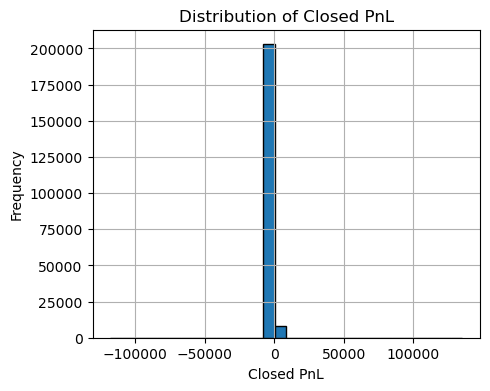

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
merged_df['Closed PnL'].hist(bins=30, edgecolor='black')
plt.title("Distribution of Closed PnL")
plt.xlabel("Closed PnL")
plt.ylabel("Frequency")
plt.show()


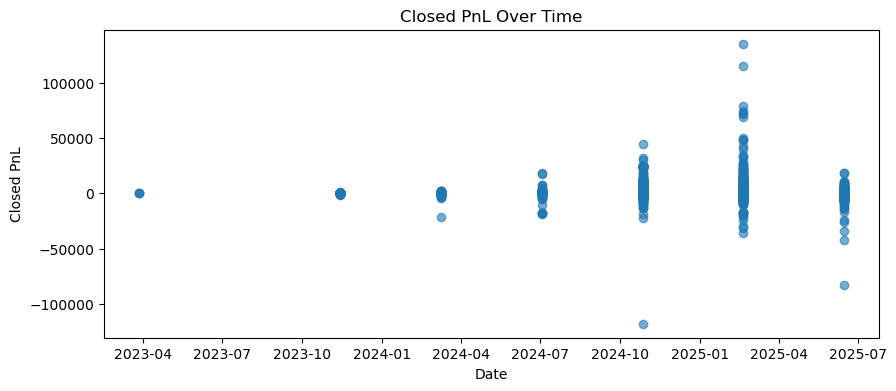

In [23]:
plt.figure(figsize=(10,4))
plt.scatter(merged_df['trade_date'], merged_df['Closed PnL'], alpha=0.6)
plt.title("Closed PnL Over Time")
plt.xlabel("Date")
plt.ylabel("Closed PnL")
plt.show()
